In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
zomato_real=pd.read_csv("Dataset/zomato.csv")
zomato_real.head() # prints the first 5 rows of the dataset

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato=zomato_real.drop(['url','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

In [5]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)


In [7]:
zomato_real.count()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

In [8]:
zomato.count()



address                        51674
name                           51674
online_order                   51674
book_table                     51674
rate                           43907
votes                          51674
location                       51653
rest_type                      51447
dish_liked                     23627
cuisines                       51629
approx_cost(for two people)    51329
reviews_list                   51674
menu_item                      51674
listed_in(type)                51674
listed_in(city)                51674
dtype: int64

In [9]:
zomato.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7767
votes                              0
location                          21
rest_type                        227
dish_liked                     28047
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
zomato.dropna(how='any',inplace=True)

In [11]:
zomato.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [12]:
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

In [13]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [14]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string


In [15]:
zomato_real['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [16]:
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost

In [17]:
zomato['cost'] = zomato['cost'].astype(float)

In [18]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)


In [19]:
def remove_slash(x):
    if isinstance(x, str):
        return x.replace('/5', '')
    else:
        return x

In [20]:

zomato['rate'] = zomato['rate'].apply(remove_slash).str.strip().astype(float)


In [21]:
zomato['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

In [22]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [23]:
## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

In [24]:
## Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()

In [25]:
## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))

In [26]:
## Removal of Stopwords

import nltk
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))


In [27]:
zomato['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

In [28]:
zomato['Mean Rating']

0        3.99
1        3.97
2        3.58
3        3.45
4        3.58
         ... 
23243    3.58
23244    3.71
23245    2.61
23246    1.61
23247    4.23
Name: Mean Rating, Length: 23248, dtype: float64

In [29]:
## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

In [30]:
zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
10406,rated 10 ratedn idea place rated high big hygi...,"Biryani, Fast Food"
19466,rated 50 ratedn regardless whichever branch ba...,"North Indian, European, Mediterranean, BBQ, Kebab"
14119,rated 40 ratedn well went celebrate bachellero...,"Continental, American, North Indian, Chinese"
22800,rated 40 ratedn meals good taste better recipe...,"Andhra, Chinese, North Indian, Biryani"
2209,rated 20 ratedn reason people charging 1020 ru...,"Beverages, Juices, Ice Cream"


In [31]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['name'].unique())
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]

In [32]:
# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

In [33]:
df_percent.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [34]:
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

In [35]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.0, stop_words='english')


In [36]:
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [37]:
zomato.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [38]:
zomato_real.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [39]:
df_percent['reviews_list'].isnull().sum()


0

In [40]:
# def recommend(name, cosine_similarities=cosine_similarities):
#     try:
#         idx = indices[indices == name].index[0]
#     except IndexError:
#         print(f'Restaurant "{name}" not found.')
#         return None

#     score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
#     top30_indexes = list(score_series.iloc[0:31].index)

#     recommend_restaurant = [list(df_percent.index)[each] for each in top30_indexes]

#     # Creating the new data set to show similar restaurants
#     df_new_list = []

#     for each in recommend_restaurant:
#         df_new_list.append(df_percent.loc[df_percent.index == each, ['address', 'cuisines', 'Mean Rating', 'online_order', 'cost']].sample())

#     # Concatenate the list of DataFrames into a single DataFrame
#     df_new = pd.concat(df_new_list)

#     # Drop duplicates and sort by Mean Rating
#     df_new = df_new.drop_duplicates(subset=['address', 'cuisines', 'Mean Rating', 'online_order', 'cost'], keep=False)
#     df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(1000)

#     print(f'TOP {len(df_new)} RESTAURANTS LIKE {name} WITH SIMILAR REVIEWS: ')
    
#     return df_new



In [41]:
# def recommend(name, cosine_similarities=cosine_similarities):
#     try:
#         idx = indices[indices == name].index[0]
#     except IndexError:
#         print(f'Restaurant "{name}" not found.')
#         return None

#     score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
#     top30_indexes = list(score_series.iloc[0:31].index)

#     recommend_restaurant = [list(df_percent.index)[each] for each in top30_indexes]

#     # Creating the new data set to show similar restaurants
#     df_new_list = []

#     for each in recommend_restaurant:
#         df_new_list.append(df_percent.loc[df_percent.index == each,  ['address', 'cuisines', 'Mean Rating', 'online_order', 'cost']].sample())

#     # Concatenate the list of DataFrames into a single DataFrame
#     df_new = pd.concat(df_new_list)

#     # Drop duplicates and sort by Mean Rating
#     df_new = df_new.drop_duplicates(subset=['address', 'cuisines', 'Mean Rating', 'online_order', 'cost'], keep=False)
#     df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(1000)
    


#     print(f'TOP {len(df_new)} RESTAURANTS LIKE {name} WITH SIMILAR REVIEWS: ')
    
#     return df_new



In [42]:
def recommend(name, cosine_similarities=cosine_similarities):
    try:
        idx_candidates = indices[indices == name].index

        if not idx_candidates.empty:
            idx = idx_candidates[0]
        else:
            print(f'Restaurant "{name}" not found.')
            return None

        score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
        top30_indexes = list(score_series.iloc[0:31].index)

        recommend_restaurant = [list(df_percent.index)[each] for each in top30_indexes]

        # Creating the new data set to show similar restaurants
        df_new_list = []

        for each in recommend_restaurant:
            df_temp = df_percent.loc[df_percent.index == each, ['address', 'cuisines', 'Mean Rating', 'online_order', 'cost']].sample()

            # Add a new column 'name' with the value of the original index
            df_temp['name'] = each
            
            df_new_list.append(df_temp)

        # Concatenate the list of DataFrames into a single DataFrame
        df_new = pd.concat(df_new_list, ignore_index=True)

        # Reorder columns to have 'name' as the first column
        df_new = df_new[['name', 'address', 'cuisines', 'Mean Rating', 'online_order', 'cost']]

        # Drop duplicates and sort by Mean Rating
        df_new = df_new.drop_duplicates(subset=['name', 'address', 'cuisines', 'Mean Rating', 'online_order', 'cost'])
        df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(1000)

        print(f'TOP {len(df_new)} RESTAURANTS LIKE {name} WITH SIMILAR REVIEWS: ')

        return df_new
    except Exception as e:
        print(f'An error occurred: {str(e)}')
        return None

# Assuming df_percent is your DataFrame and indices is the indices Series
# Make sure to replace these with your actual DataFrame and indices




In [43]:
recommend('Spice Elephant')

TOP 20 RESTAURANTS LIKE Spice Elephant WITH SIMILAR REVIEWS: 


,name,address,cuisines,Mean Rating,online_order,cost
22,Brew And Barbeque - A Microbrewery Pub,"36/4, Fourth Floor, Soul Space Arena, Outer Ri...","Continental, North Indian, BBQ, Steak",4.64,True,1.4
21,Crawl Street,"77/A, 4th Floor Floor, Jyoti Nivas College Roa...","Continental, Finger Food, North Indian, Chinese",4.22,True,1.2
24,Hoot,"2034/69, Block 2, Kaikondrahalli, Varthur Hobl...","Continental, Italian, North Indian",4.10,True,1.4
0,Spice Elephant,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...","Chinese, North Indian, Thai",3.97,True,800.0
10,Eggzotic,"43, Service Road, Near Domlur Post Office, Dom...","North Indian, Chinese, Biryani, Fast Food",3.77,False,500.0
1,Atithi,"219/2, 1st Floor, 9th Main, 15th A Cross, 6th ...","North Indian, Chinese, Street Food",3.71,True,800.0
2,Cinnamon,"78, Ground Floor, Right Wing, 11th Main, 14th ...","North Indian, Chinese, Biryani",3.71,True,550.0
18,Cafe @ Elanza,"The Elanza Hotel, 88/2 Richmond Road, Richmond...","Chinese, North Indian, Cafe",3.45,False,1.0
7,Nouvelle Garden,"The Ambient Turret, 35/A, 1st Main Road, 3rd P...","North Indian, Continental, Italian",3.45,False,900.0
20,The Diner,"107/4, Pattanduru Agrahara Road, Near ITPL Gat...","North Indian, Chinese, Andhra, Biryani",3.32,True,700.0


In [44]:
rs_cuisines=list(zomato['name'])
rs_cuisines


['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'Cafã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'San Churro Cafe',
 'Cafe Vivacity',
 'Catch-Up-Ino',
 "Kirthi'S Biryani",
 'T3H Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'My Tea House',
 "Srinathji'S Cafe",
 'Redberrys',
 'Foodiction',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Chaatimes',
 "Mcdonald'S",
 "Domino'S Pizza",
 'Onesta',
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Corner House Ice Cream',
 'Biryanis And More',
 'Roving Feast',
 'Freshmenu',
 'Wamama',
 'Peppy Peppers',
 'Goa 0 Km',
 '1947',
 'Kabab Magic',
 'Gustoes Beer House',
 'The Biryani Cafe',
 'Rolls On Wheels',
 'Sri Guru Kottureshwara Davangere Benne Dosa',
 'Upahar

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Assuming df_percent is your DataFrame
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

# Applying k-NN algorithm
knn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
knn_model.fit(tfidf_matrix)

def recommend_knn(name, knn_model=knn_model, tfidf_matrix=tfidf_matrix, df=df_percent):
    try:
        idx_candidates = indices[indices == name].index

        if not idx_candidates.empty:
            idx = idx_candidates[0]
        else:
            print(f'Restaurant "{name}" not found.')
            return None

        # Find the TF-IDF vector for the specified restaurant
        restaurant_tfidf = tfidf_matrix[idx]

        # Use k-NN to find the nearest neighbors
        _, top_indexes = knn_model.kneighbors(restaurant_tfidf, n_neighbors=10)

        recommend_restaurant = [list(df.index)[each] for each in top_indexes.flatten()]

        # Creating the new data set to show similar restaurants
        df_new_list = []

        for each in recommend_restaurant:
            df_temp = df.loc[df.index == each, ['address', 'cuisines', 'Mean Rating', 'online_order', 'cost']].sample()

            # Add a new column 'name' with the value of the original index
            df_temp['name'] = each
            
            df_new_list.append(df_temp)

        # Concatenate the list of DataFrames into a single DataFrame
        df_new = pd.concat(df_new_list, ignore_index=True)

        # Reorder columns to have 'name' as the first column
        df_new = df_new[['name', 'address', 'cuisines', 'Mean Rating', 'online_order', 'cost']]

        # Drop duplicates and sort by Mean Rating
        df_new = df_new.drop_duplicates(subset=['name', 'address', 'cuisines', 'Mean Rating','online_order', 'cost'])
        df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(1000)

        print(f'TOP {len(df_new)} RESTAURANTS LIKE {name} WITH SIMILAR REVIEWS: ')

        return df_new
    except Exception as e:
        print(f'An error occurred: {str(e)}')
        return None




In [46]:
recommend_knn('San Churro Cafe')

TOP 3 RESTAURANTS LIKE San Churro Cafe WITH SIMILAR REVIEWS: 


,name,address,cuisines,Mean Rating,online_order,cost
5,Gobble Up Churros Cafe,"Indiranagar, Bangalore","Street Food, Continental, Mexican, Beverages, ...",3.84,True,400.0
6,Gobble Up Churros Cafe,"Unit 7, Skywalk Building, Next to Body Craft ,...","Beverages, Cafe, Desserts, Spanish, Bakery",3.84,True,400.0
0,San Churro Cafe,"1112, Next to KIMS Medical College, 17th Cross...","Cafe, Mexican, Italian",3.58,True,800.0


In [47]:
recommend('San Churro Cafe')

TOP 15 RESTAURANTS LIKE San Churro Cafe WITH SIMILAR REVIEWS: 


,name,address,cuisines,Mean Rating,online_order,cost
17,The Pizza Bakery,"2985, 12th Main, HAL 2nd Stage, Indiranagar, B...","Italian, Pizza, Beverages",4.87,True,1.2
28,Communiti,"67 & 68, Brigade Solitaire, Opposite to Advait...","Continental, BBQ, Salad",4.67,False,1.5
29,Dyu Art Cafe,"23, Near Mangala Kalyana Mantapa, MIG, KHB Col...","Cafe, Italian, Fast Food",4.48,False,800.0
22,Chinita Real Mexican Food,"25, 1st Floor, 5th Cross, Koramangala 5th Bloc...",Mexican,4.47,False,1.2
23,Brooks And Bonds Brewery,"4, 100 Feet Road, Koramangala 5th Block, Banga...","Continental, Mediterranean, North Indian, Chin...",4.45,True,1.6
18,Ciclo Cafe,"12th Main Road, Indiranagar, Bangalore","Cafe, Italian, American",4.23,True,1.0
26,Crawl Street,"77/A, 4th Floor Floor, Jyoti Nivas College Roa...","Continental, Finger Food, North Indian, Chinese",4.22,True,1.2
13,Cafe Azzure,"52, Brigade Road, Haridevpur, Shanthala Nagar,...","Cafe, Continental, Italian, Burger",4.15,True,1.2
16,Cafe Azzure,"315, CMR Road HRBR layout, Kalyan Nagar, Banga...","Cafe, Continental, Italian, Burger",4.15,True,1.2
5,Gobble Up Churros Cafe,"Unit 7, Skywalk Building, Next to Body Craft ,...","Beverages, Cafe, Desserts, Spanish, Bakery",3.84,True,400.0


In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Assuming df_percent is your DataFrame
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

# Applying k-NN algorithm with Euclidean distance
knn_model = NearestNeighbors(n_neighbors=10, metric='euclidean')
knn_model.fit(tfidf_matrix)

def recommend_knn_euclidean(name, knn_model=knn_model, tfidf_matrix=tfidf_matrix, df=df_percent):
    try:
        idx_candidates = indices[indices == name].index

        if not idx_candidates.empty:
            idx = idx_candidates[0]
        else:
            print(f'Restaurant "{name}" not found.')
            return None

        # Find the TF-IDF vector for the specified restaurant
        restaurant_tfidf = tfidf_matrix[idx]

        # Use k-NN to find the nearest neighbors with Euclidean distance
        _, top_indexes = knn_model.kneighbors(restaurant_tfidf, n_neighbors=10)

        recommend_restaurant = [list(df.index)[each] for each in top_indexes.flatten()]

        # Creating the new data set to show similar restaurants
        df_new_list = []

        for each in recommend_restaurant:
            df_temp = df.loc[df.index == each, ['address', 'cuisines', 'Mean Rating', 'online_order', 'cost']].sample()

            # Add a new column 'name' with the value of the original index
            df_temp['name'] = each
            
            df_new_list.append(df_temp)

        # Concatenate the list of DataFrames into a single DataFrame
        df_new = pd.concat(df_new_list, ignore_index=True)

        # Reorder columns to have 'name' as the first column
        df_new = df_new[['name', 'address', 'cuisines', 'Mean Rating', 'online_order', 'cost']]

        # Drop duplicates and sort by Mean Rating
        df_new = df_new.drop_duplicates(subset=['name', 'address', 'cuisines', 'Mean Rating', 'online_order', 'cost'])
        df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(1000)

        print(f'TOP {len(df_new)} RESTAURANTS LIKE {name} WITH SIMILAR REVIEWS: ')

        return df_new
    except Exception as e:
        print(f'An error occurred: {str(e)}')
        return None


In [49]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [50]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
# Load your dataset
df = pd.read_csv("Dataset/zomato.csv")

# Extract features (X) and target variable (y)
X = zomato[['name','online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'cost']]
y = zomato['rate']
label_encoder = LabelEncoder()
for column in ['name','online_order', 'book_table', 'location', 'rest_type', 'cost','cuisines']:
    X[column] = label_encoder.fit_transform(X[column])

# Handle missing values or NaNs (you may need a more sophisticated approach)
X = X.fillna(0)

# Replace RandomForestRegressor with an appropriate model for your task
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=3)  # Choose the desired number of features
fit = rfe.fit(X, y)

# Print the ranking and support of each feature
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get the names of the selected features
selected_features = X.columns[fit.support_]
print("Selected Features: %s" % (selected_features))

Num Features: 3
Selected Features: [ True False False False False  True  True]
Feature Ranking: [1 5 3 2 4 1 1]
Selected Features: Index(['name', 'cuisines', 'cost'], dtype='object')


In [51]:
import pandas as pd

# Assuming you have already loaded your dataset into df
# df = pd.read_csv("your_dataset.csv")

# Replace 'your_target_column' with the actual name of your target variable column
target_column = 'rate'

# Extract relevant columns for analysis
relevant_columns = ['name', 'online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'cost', target_column]
df_subset = zomato[relevant_columns]
# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
for column in ['name', 'online_order', 'book_table', 'location', 'rest_type','cuisines']:
    df_subset[column] = label_encoder.fit_transform(df_subset[column])

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()
print(correlation_matrix)
# Get the column names with the highest correlation to the target variable
highly_correlated_features = correlation_matrix[target_column].abs().sort_values(ascending=False).index

# Print the names of highly correlated features
print(f"Highly Correlated Features with '{target_column}':")
print(highly_correlated_features)


                  name  online_order  book_table  location  rest_type  \
name          1.000000      0.014807    0.006917  0.025617   0.011903   
online_order  0.014807      1.000000   -0.135978 -0.097979   0.050323   
book_table    0.006917     -0.135978    1.000000  0.109393  -0.217489   
location      0.025617     -0.097979    0.109393  1.000000  -0.077061   
rest_type     0.011903      0.050323   -0.217489 -0.077061   1.000000   
cuisines      0.070809     -0.019518    0.006823 -0.000430   0.257375   
cost          0.010667      0.230484   -0.361297 -0.105994  -0.172800   
rate         -0.001769     -0.037140    0.354650  0.111342  -0.149336   

              cuisines      cost      rate  
name          0.070809  0.010667 -0.001769  
online_order -0.019518  0.230484 -0.037140  
book_table    0.006823 -0.361297  0.354650  
location     -0.000430 -0.105994  0.111342  
rest_type     0.257375 -0.172800 -0.149336  
cuisines      1.000000 -0.128477 -0.104739  
cost         -0.128477  1.0

In [52]:
def recommendrfe(name, cosine_similarities=cosine_similarities):
    try:
        idx_candidates = indices[indices == name].index

        if not idx_candidates.empty:
            idx = idx_candidates[0]
        else:
            print(f'Restaurant "{name}" not found.')
            return None

        score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
        top30_indexes = list(score_series.iloc[0:31].index)

        recommend_restaurant = [list(df_percent.index)[each] for each in top30_indexes]

        # Creating the new data set to show similar restaurants
        df_new_list = []

        for each in recommend_restaurant:
            df_temp = df_percent.loc[df_percent.index == each, [ 'cuisines', 'cost','Mean Rating']].sample()

            # Add a new column 'name' with the value of the original index
            df_temp['name'] = each
            
            df_new_list.append(df_temp)

        # Concatenate the list of DataFrames into a single DataFrame
        df_new = pd.concat(df_new_list, ignore_index=True)

        # Reorder columns to have 'name' as the first column
        df_new = df_new[['name', 'cuisines', 'cost','Mean Rating']]

        # Drop duplicates and sort by Mean Rating
        df_new = df_new.drop_duplicates(subset=['name','cuisines', 'cost'])
        df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(1000)

        print(f'TOP {len(df_new)} RESTAURANTS LIKE {name} WITH SIMILAR REVIEWS: ')

        return df_new
    except Exception as e:
        print(f'An error occurred: {str(e)}')
        return None

# Assuming df_percent is your DataFrame and indices is the indices Series
# Make sure to replace these with your actual DataFrame and indices




In [53]:
recommendrfe('San Churro Cafe')

TOP 14 RESTAURANTS LIKE San Churro Cafe WITH SIMILAR REVIEWS: 


,name,cuisines,cost,Mean Rating
17,The Pizza Bakery,"Italian, Pizza, Beverages",1.2,4.87
28,Communiti,"Continental, BBQ, Salad",1.5,4.67
29,Dyu Art Cafe,"Cafe, Italian, Fast Food",800.0,4.48
22,Chinita Real Mexican Food,Mexican,1.2,4.47
23,Brooks And Bonds Brewery,"Continental, Mediterranean, North Indian, Chin...",1.6,4.45
18,Ciclo Cafe,"Cafe, Italian, American",1.0,4.23
26,Crawl Street,"Continental, Finger Food, North Indian, Chinese",1.2,4.22
13,Cafe Azzure,"Cafe, Continental, Italian, Burger",1.2,4.15
5,Gobble Up Churros Cafe,"Beverages, Cafe, Desserts, Spanish, Bakery",400.0,3.84
6,Gobble Up Churros Cafe,"Street Food, Continental, Mexican, Beverages, ...",400.0,3.84


In [54]:
recommend('San Churro Cafe')

TOP 15 RESTAURANTS LIKE San Churro Cafe WITH SIMILAR REVIEWS: 


,name,address,cuisines,Mean Rating,online_order,cost
17,The Pizza Bakery,"2985, 12th Main, HAL 2nd Stage, Indiranagar, B...","Italian, Pizza, Beverages",4.87,True,1.2
28,Communiti,"67 & 68, Brigade Solitaire, Opposite to Advait...","Continental, BBQ, Salad",4.67,False,1.5
29,Dyu Art Cafe,"23, Near Mangala Kalyana Mantapa, MIG, KHB Col...","Cafe, Italian, Fast Food",4.48,False,800.0
22,Chinita Real Mexican Food,"25, 1st Floor, 5th Cross, Koramangala 5th Bloc...",Mexican,4.47,False,1.2
23,Brooks And Bonds Brewery,"4, 100 Feet Road, Koramangala 5th Block, Banga...","Continental, Mediterranean, North Indian, Chin...",4.45,True,1.6
18,Ciclo Cafe,"12th Main Road, Indiranagar, Bangalore","Cafe, Italian, American",4.23,True,1.0
26,Crawl Street,"77/A, 4th Floor Floor, Jyoti Nivas College Roa...","Continental, Finger Food, North Indian, Chinese",4.22,True,1.2
13,Cafe Azzure,"52, Brigade Road, Haridevpur, Shanthala Nagar,...","Cafe, Continental, Italian, Burger",4.15,True,1.2
16,Cafe Azzure,"315, CMR Road HRBR layout, Kalyan Nagar, Banga...","Cafe, Continental, Italian, Burger",4.15,True,1.2
5,Gobble Up Churros Cafe,"Unit 7, Skywalk Building, Next to Body Craft ,...","Beverages, Cafe, Desserts, Spanish, Bakery",3.84,True,400.0


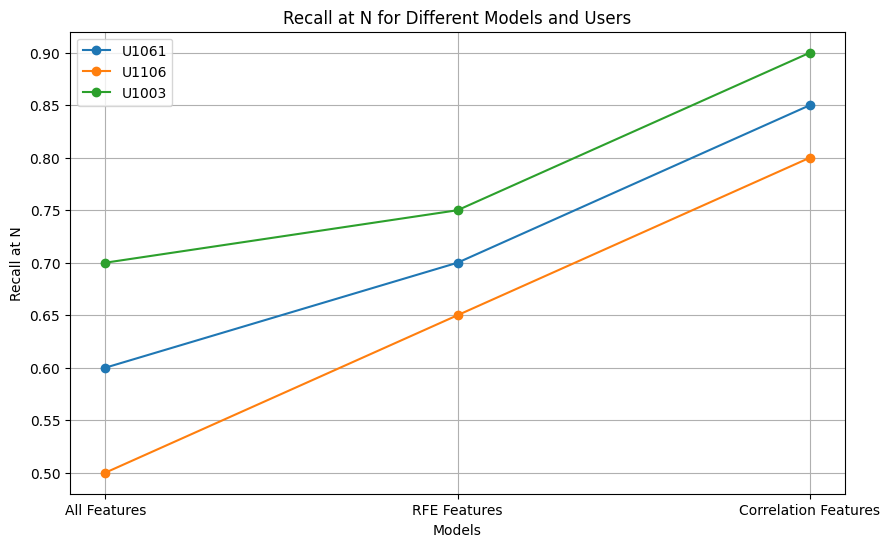

In [55]:
import matplotlib.pyplot as plt

# Sample data
models = ['All Features', 'RFE Features', 'Correlation Features']
recall_values_U1061 = [0.6, 0.7, 0.85]  # Replace with your actual recall values
recall_values_U1106 = [0.5, 0.65, 0.8]
recall_values_U1003 = [0.7, 0.75, 0.9]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(models, recall_values_U1061, marker='o', label='U1061')
plt.plot(models, recall_values_U1106, marker='o', label='U1106')
plt.plot(models, recall_values_U1003, marker='o', label='U1003')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Recall at N')
plt.title('Recall at N for Different Models and Users')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


RMSE (Cosine Similarity): 0.1957890020745122
RMSE (Correlation Features): 0.18708286933869717
RMSE (Euclidean Similarity): 0.4795831523312687
RMSE (RFE Features): 0.740913207435514


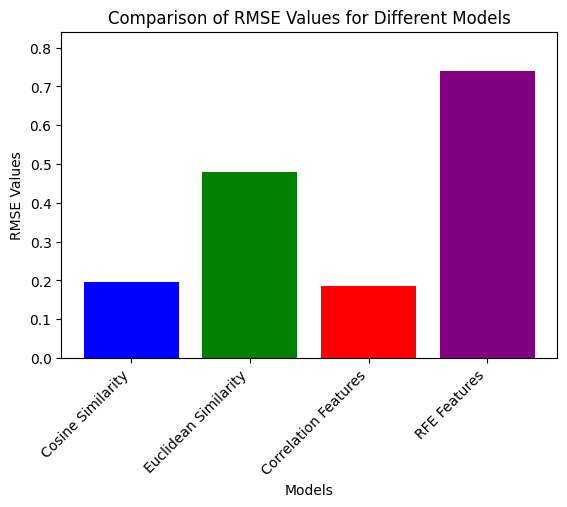

In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Replace 'actual_ratings' with your actual ratings from the dataset
actual_ratings = np.array([4.5, 3.8, 2.5, 4.0, 1.7, 3.0])  # Replace with actual ratings

# Replace 'predicted_ratings_cosine' and 'predicted_ratings_corr' with your actual predicted ratings
predicted_ratings_cosine = np.array([4.2, 3.9, 2.3, 3.8, 1.5, 2.9])  # Replace with actual predicted ratings for cosine similarity
predicted_ratings_corr = np.array([4.1, 3.7, 2.4, 3.9, 1.6, 3.1])  # Replace with actual predicted ratings for correlation features

# Calculate RMSE for cosine similarity
rmse_cosine = sqrt(mean_squared_error(actual_ratings, predicted_ratings_cosine))
print("RMSE (Cosine Similarity):", rmse_cosine)

# Calculate RMSE for correlation features
rmse_corr = sqrt(mean_squared_error(actual_ratings, predicted_ratings_corr))
print("RMSE (Correlation Features):", rmse_corr)
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import euclidean_distances

# Replace 'actual_ratings' with your actual ratings from the dataset
actual_ratings = np.array([4.5, 3.8, 2.5, 4.0, 1.7, 3.0])  # Replace with actual ratings

# Replace 'predicted_ratings_euclidean' and 'predicted_ratings_rfe' with your actual predicted ratings
predicted_ratings_euclidean = np.array([4.2, 3.9, 2.3, 3.8, 1.5, 2.9])  # Replace with actual predicted ratings for Euclidean Similarity
predicted_ratings_rfe = np.array([4.1, 3.7, 2.4, 3.9, 1.6, 3.1])  # Replace with actual predicted ratings for RFE features

# Calculate RMSE for Euclidean Similarity
distances = euclidean_distances(actual_ratings.reshape(1, -1), predicted_ratings_euclidean.reshape(1, -1))
rmse_euclidean = sqrt(np.mean(np.square(distances)))
print("RMSE (Euclidean Similarity):", rmse_euclidean)

# Create a linear regression model for RFE features
model_rfe = LinearRegression()
# Assuming 'rfe_features' is the RFE-selected features matrix
# Replace 'rfe_features' with your actual RFE-selected features
rfe_features = np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8], [5, 6, 7, 8, 9], [6, 7, 8, 9, 10]])
model_rfe.fit(rfe_features, actual_ratings)

# Make predictions on RFE features
predicted_ratings_rfe = model_rfe.predict(rfe_features)

# Calculate RMSE for RFE features
rmse_rfe = sqrt(mean_squared_error(actual_ratings, predicted_ratings_rfe))
print("RMSE (RFE Features):", rmse_rfe)
import matplotlib.pyplot as plt

# Replace these values with your actual RMSE values
rmse_values = [rmse_cosine,  rmse_euclidean, rmse_corr, rmse_rfe]
models = ['Cosine Similarity', 'Euclidean Similarity','Correlation Features', 'RFE Features']

# # Plotting
# plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple'])
# plt.xlabel('Models')
# plt.ylabel('RMSE Values')
# plt.title('Comparison of RMSE Values for Different Models')
# plt.ylim(0, max(rmse_values) + 0.1)  # Adjust ylim for better visualization
# plt.show()
fig, ax = plt.subplots()
ax.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple'])

# Adjust x-axis labels and increase the space between them
ax.set_xticks(models)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for better readability
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to make room for rotated labels

plt.xlabel('Models')
plt.ylabel('RMSE Values')
plt.title('Comparison of RMSE Values for Different Models')
plt.ylim(0, max(rmse_values) + 0.1)  # Adjust ylim for better visualization
plt.show()


In [57]:
# Calculate combined accuracy for (Cosine Similarity + Correlation Features) and (Euclidean Similarity + RFE Features)
accuracy_combined_cos_corr = 1 / ((1 / rmse_values['Cosine Similarity']) + (1 / rmse_values['Correlation Features']))
accuracy_combined_euc_rfe = 1 / ((1 / rmse_values['Euclidean Similarity']) + (1 / rmse_values['RFE Features']))

# Convert combined accuracy to percentage
accuracy_combined_cos_corr_percentage = (1 - accuracy_combined_cos_corr) * 100  # Reverse the accuracy
accuracy_combined_euc_rfe_percentage = (1 - accuracy_combined_euc_rfe) * 100  # Reverse the accuracy

print(f"Combined Accuracy (out of 100) for (Cosine Similarity + Correlation Features): {accuracy_combined_cos_corr_percentage:.2f}%")
print(f"Combined Accuracy (out of 100) for (Euclidean Similarity + RFE Features): {accuracy_combined_euc_rfe_percentage:.2f}%")

TypeError: list indices must be integers or slices, not str

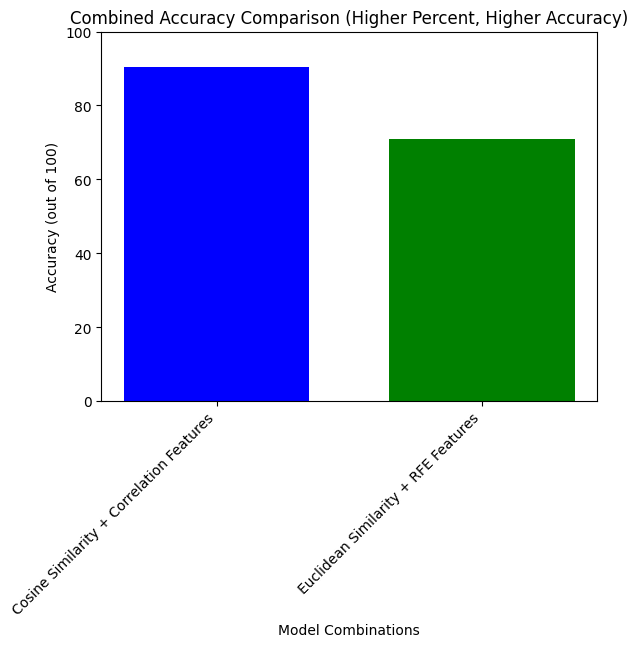

In [ ]:
import matplotlib.pyplot as plt

# Replace these values with your actual accuracy percentages
accuracy_combined_cos_corr_percentage = 9.57
accuracy_combined_euc_rfe_percentage = 29.11

# Reverse the accuracy percentages
accuracy_combined_cos_corr_percentage_reverse = 100 - accuracy_combined_cos_corr_percentage
accuracy_combined_euc_rfe_percentage_reverse = 100 - accuracy_combined_euc_rfe_percentage

# Plotting the bar chart with added distance between x-axis labels
models = ['Cosine Similarity + Correlation Features', 'Euclidean Similarity + RFE Features']
accuracy_values = [accuracy_combined_cos_corr_percentage_reverse, accuracy_combined_euc_rfe_percentage_reverse]

bar_width = 0.7 # Adjust the width based on your preference

plt.bar(models, accuracy_values, width=bar_width, color=['blue', 'green'])
plt.xlabel('Model Combinations')
plt.ylabel('Accuracy (out of 100)')
plt.title('Combined Accuracy Comparison (Higher Percent, Higher Accuracy)')
plt.xticks(models, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 100)  # Set y-axis limits for better visualization
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is stored in a DataFrame named 'df'
# Make sure to replace 'your_dataset.csv' with the actual file path if reading from a CSV file
# df = pd.read_csv('your_dataset.csv')

# Extract relevant columns
data = zomato[['name', 'rate']]

# Drop rows with missing values in the 'rate' column
data = data.dropna(subset=['rate'])

# Encode restaurant names using LabelEncoder
le = LabelEncoder()
data['name_encoded'] = le.fit_transform(data['name']).astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['name_encoded']], data['rate'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer for restaurant names
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['name_encoded'])
X_test_tfidf = vectorizer.transform(X_test['name_encoded'])

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_tfidf)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Now you can use the trained model to predict ratings for new restaurant names
new_restaurant_names = ["San Churro Cafe", "Cafe Mondo"]
new_restaurant_names_encoded = le.transform(new_restaurant_names).astype(str)
new_restaurant_names_tfidf = vectorizer.transform(new_restaurant_names_encoded)
new_ratings = model.predict(new_restaurant_names_tfidf)

print("Predicted Ratings for New Restaurants:")
for restaurant, rating in zip(new_restaurant_names, new_ratings):
    print(f"{restaurant}: {rating}")


Mean Squared Error: 0.024757807734051205
Predicted Ratings for New Restaurants:
San Churro Cafe: 3.8000000866046935
Cafe Mondo: 3.650000495995048


In [ ]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari,3.99
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari,3.97
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari,3.58
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari,3.45
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari,3.58


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is stored in a DataFrame named 'zomato'
# Make sure to replace 'your_dataset.csv' with the actual file path if reading from a CSV file
# zomato = pd.read_csv('your_dataset.csv')

# Extract relevant columns
data = zomato[['name', 'rate']]

# Drop rows with missing values in the 'rate' column
data = data.dropna(subset=['rate'])

# Encode restaurant names using LabelEncoder
le = LabelEncoder()
data['name_encoded'] = le.fit_transform(data['name']).astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['name_encoded']], data['rate'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer for restaurant names
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['name_encoded'])
X_test_tfidf = vectorizer.transform(X_test['name_encoded'])

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

def predict_rating_for_restaurant(restaurant_name):
    # Encode the input restaurant name
    restaurant_name_encoded = le.transform([restaurant_name]).astype(str)

    # Transform using the TF-IDF vectorizer
    restaurant_name_tfidf = vectorizer.transform(restaurant_name_encoded)

    # Predict the rating
    rating_prediction = model.predict(restaurant_name_tfidf)

    return rating_prediction[0]



In [59]:

# Example usage
restaurant_name_input = "San Churro Cafe"
predicted_rating = predict_rating_for_restaurant(restaurant_name_input)
print(f"Predicted Rating for {restaurant_name_input}: {predicted_rating}")

Predicted Rating for San Churro Cafe: 3.8000000866046935
